In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import f_regression, chi2, SelectKBest

In [3]:
train = pd.read_csv('../data/tabular-playground-series-aug-2021/train.csv', index_col='id')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250000 entries, 0 to 249999
Columns: 101 entries, f0 to loss
dtypes: float64(95), int64(6)
memory usage: 194.5 MB


In [5]:
train.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
id,,,,,,,,,,,,,,,,,,,,,
0,-0.002350,59,0.766739,-1.350460,42.2727,16.68570,30.3599,1.267300,0.392007,1.09101,...,-42.43990,26.854000,1.45751,0.696161,0.941764,1.828470,0.924090,2.29658,10.48980,15
1,0.784462,145,-0.463845,-0.530421,27324.9000,3.47545,160.4980,0.828007,3.735860,1.28138,...,-184.13200,7.901370,1.70644,-0.494699,-2.058300,0.819184,0.439152,2.36470,1.14383,3
2,0.317816,19,-0.432571,-0.382644,1383.2600,19.71290,31.1026,-0.515354,34.430800,1.24210,...,7.43721,37.218100,3.25339,0.337934,0.615037,2.216760,0.745268,1.69679,12.30550,6
3,0.210753,17,-0.616454,0.946362,-119.2530,4.08235,185.2570,1.383310,-47.521400,1.09130,...,9.66778,0.626942,1.49425,0.517513,-10.222100,2.627310,0.617270,1.45645,10.02880,2
4,0.439671,20,0.968126,-0.092546,74.3020,12.30650,72.1860,-0.233964,24.399100,1.10151,...,290.65700,15.604300,1.73557,-0.476668,1.390190,2.195740,0.826987,1.78485,7.07197,1


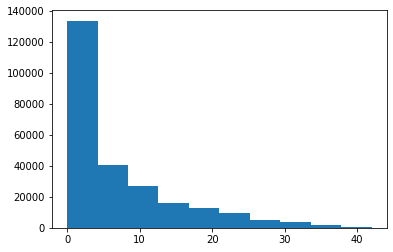

In [6]:
_ = plt.hist(train.loss)

In [7]:
features = train.columns.values[:-1]
target = train.columns.values[-1]

In [8]:
param_grid = {'gradientboostingregressor__max_leaf_nodes': [2, 3, 4, None]}

In [9]:
scaler = StandardScaler()
pca = PCA(n_components=5)
# skb = SelectKBest(score_func=f_regression, k=50)
reg = GradientBoostingRegressor(criterion='mse', max_features='auto', n_estimators=500, verbose=1)
pipe = make_pipeline(scaler, pca, reg)

# gscv = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs=-1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(train[features], train[target], test_size=0.2)

In [11]:
pipe.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1          63.0825            3.13m
         2          63.0592            3.15m
         3          63.0394            3.14m
         4          63.0198            3.14m
         5          63.0029            3.13m
         6          62.9886            3.16m
         7          62.9761            3.14m
         8          62.9637            3.12m
         9          62.9534            3.11m
        10          62.9427            3.10m
        20          62.8780            3.00m
        30          62.8349            2.92m
        40          62.8018            2.86m
        50          62.7746            2.80m
        60          62.7457            2.73m
        70          62.7208            2.67m
        80          62.7000            2.61m
        90          62.6760            2.54m
       100          62.6582            2.48m
       200          62.4730            1.84m
       300          62.2885            1.22m
       40

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=5)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(criterion='mse', max_features='auto',
                                           n_estimators=500, verbose=1))])

In [12]:
test = pd.read_csv('../data/tabular-playground-series-aug-2021/test.csv', index_col='id')

In [13]:
y_pred = pipe.predict(X_test)

(array([3.8000e+01, 2.5460e+03, 4.6462e+04, 8.4400e+02, 8.0000e+01,
        1.9000e+01, 7.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 1.90634159,  3.92856397,  5.95078635,  7.97300874,  9.99523112,
        12.0174535 , 14.03967588, 16.06189826, 18.08412064, 20.10634302,
        22.1285654 ]),
 <a list of 10 Patch objects>)

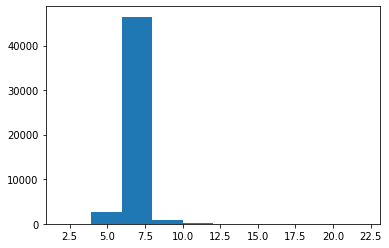

In [14]:
plt.hist(y_pred)

In [15]:
np.sqrt(mean_squared_error(y_test, y_pred))

7.921216406567699

In [16]:
# gscv.best_params_

In [17]:
# pipe.fit(train[features], train[target])

# test['loss'] = pipe.predict(test[features])

# test[['loss']].to_csv('../submission.csv')